In [2]:
import tensorflow
import pandas as pd
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(random_state=42,noise=0.1)

In [4]:
X

array([[-0.36503093, -0.76613441],
       [ 0.79142545,  0.42486577],
       [-0.62605489,  0.52993267],
       [ 0.71938348, -0.59898403],
       [ 0.87586276, -0.79693694],
       [ 0.28238185, -0.8096356 ],
       [-0.88398798,  0.19969581],
       [-0.61452907, -0.4783401 ],
       [ 0.35579647,  1.02466875],
       [ 0.92202981, -0.08438964],
       [-0.65247738,  0.67395748],
       [-0.79396809, -0.59912738],
       [-0.51151371,  0.09644282],
       [-0.61403158, -0.80193362],
       [ 0.33448411, -0.53212261],
       [ 1.03859873,  0.56412698],
       [-0.76438584, -0.01060355],
       [-0.83589873, -0.2305685 ],
       [-0.08545191,  0.97514198],
       [-0.6327045 , -0.70551635],
       [ 0.5698093 ,  0.43425039],
       [ 0.12264074, -0.82399785],
       [-0.90712258, -0.25646566],
       [ 0.4487963 , -0.89499225],
       [-0.71416997,  0.84200403],
       [-0.41864357,  1.04254495],
       [ 0.24241093, -1.00243527],
       [ 0.73117762, -0.53125463],
       [ 0.35950546,

In [5]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [6]:
import matplotlib.pyplot as plt

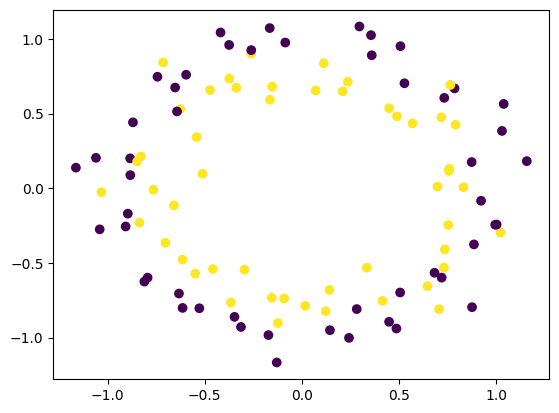

In [7]:
plt.scatter(
    x= X[:,0],
    y= X[:,1],
    c = y
)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=45)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
initial_model = Sequential()

In [12]:
initial_model.add(Dense(256,input_dim = 2,activation='relu'))
initial_model.add(Dense(1,activation='sigmoid'))

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
initial_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = initial_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2000, verbose=0)

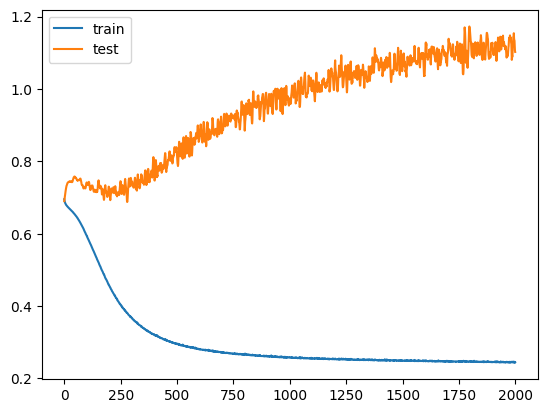

In [15]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [16]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 462us/step


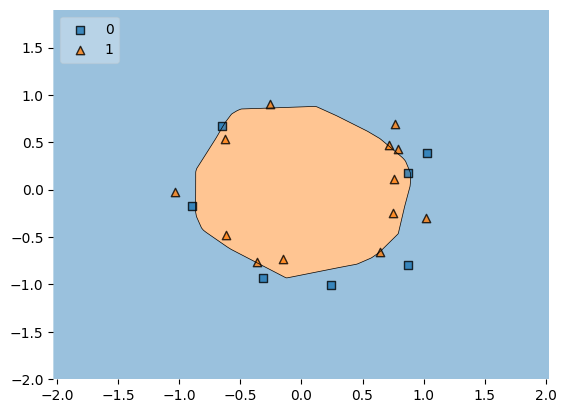

In [17]:
plot_decision_regions(X_test, y_test.ravel(), clf = initial_model, legend=2)
plt.show()

## **Early Stopping**

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
final_model = Sequential()

In [20]:
final_model.add(Dense(256,input_dim = 2, activation='relu'))
final_model.add(Dense(1,activation='sigmoid'))

c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
final_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [38]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [39]:
history_final = final_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9250 - loss: 0.2996 - val_accuracy: 0.6000 - val_loss: 0.7974
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9125 - loss: 0.2992 - val_accuracy: 0.6000 - val_loss: 0.8079
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9125 - loss: 0.2992 - val_accuracy: 0.6000 - val_loss: 0.8122
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9125 - loss: 0.2980 - val_accuracy: 0.6000 - val_loss: 0.8030
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9125 - loss: 0.2979 - val_accuracy: 0.6000 - val_loss: 0.7910
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9125 - loss: 0.2984 - val_accuracy: 0.6000 - val_loss: 0.7899
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9125 - loss: 0.2981 - val_accuracy: 0.6000 - val_loss: 0.7920
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9125 - loss: 0.2974 - val_accuracy: 0.6000 - v

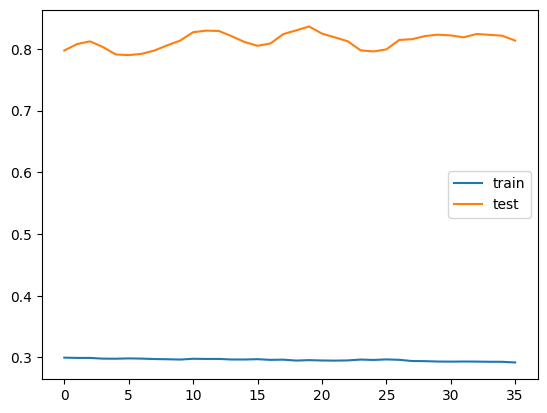

In [40]:
plt.plot(history_final.history['loss'], label='train')
plt.plot(history_final.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 463us/step


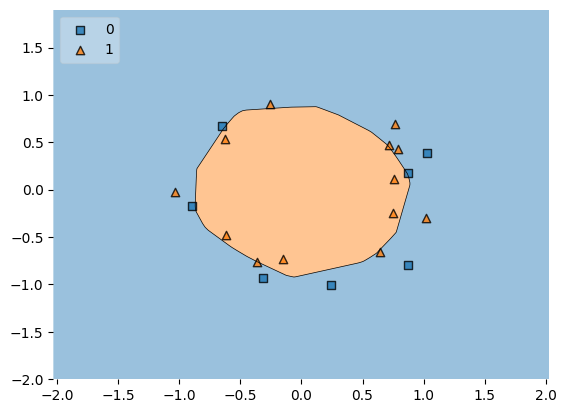

In [41]:
plot_decision_regions(X_test, y_test.ravel(), clf = final_model, legend=2)
plt.show()

Epoch 1/40


c:\Users\adhab\OneDrive\Desktop\VsCode\DataScience\Deep Learning\deeplen\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8938 - loss: 0.3798 - val_accuracy: 0.9507 - val_loss: 0.1707
Epoch 2/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9564 - loss: 0.1485 - val_accuracy: 0.9611 - val_loss: 0.1335
Epoch 3/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.1031 - val_accuracy: 0.9682 - val_loss: 0.1055
Epoch 4/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0785 - val_accuracy: 0.9707 - val_loss: 0.0993
Epoch 5/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9818 - loss: 0.0614 - val_accuracy: 0.9716 - val_loss: 0.0959
Epoch 6/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0506 - val_accuracy: 0.9707 - val_loss: 0.1000
Epoch 7/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9883 - loss: 0.0388 - val_accuracy: 0.9749 - val_loss: 0.0890
Epoch 8/40
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9904 - loss: 0.0320 - val_accuracy: 0.9730 - val_

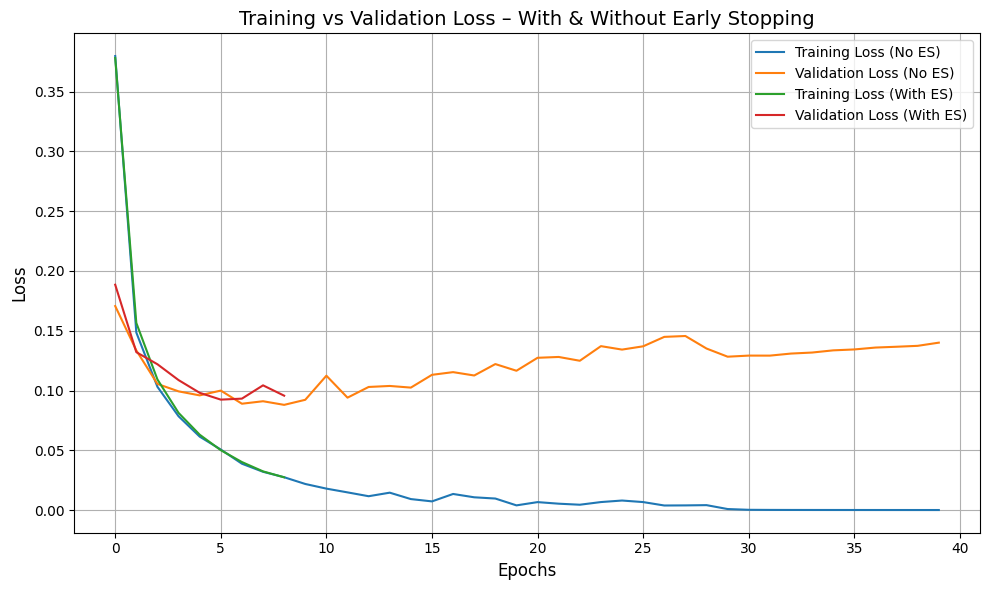

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# -------------------------
# Load dataset (MNIST)
# -------------------------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# -------------------------
# Build model function
# -------------------------
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# -------------------------
# Train model WITHOUT early stopping
# -------------------------
model_normal = build_model()

history_normal = model_normal.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=128,
    verbose=1
)

# -------------------------
# Train model WITH early stopping
# -------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_es = build_model()

history_es = model_es.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# -------------------------
# Plot comparison graph
# -------------------------
plt.figure(figsize=(10, 6))

# Without Early Stopping
plt.plot(history_normal.history['loss'], label='Training Loss (No ES)')
plt.plot(history_normal.history['val_loss'], label='Validation Loss (No ES)')

# With Early Stopping
plt.plot(history_es.history['loss'], label='Training Loss (With ES)')
plt.plot(history_es.history['val_loss'], label='Validation Loss (With ES)')

plt.title("Training vs Validation Loss – With & Without Early Stopping", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()